## Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Read Dataset


In [2]:
df = pd.read_csv("pakwheels.csv")

In [3]:
df.head(3)

,Unnamed: 0,ad_url,title,location,model_year,price,mileage,engine_type,transmission,registered_in,color,assembly,engine_capacity,body_type,ad_last_updated,car_features,description
0,0,https://www.pakwheels.com/used-cars/honda-civi...,Honda Civic VTi Oriel Prosmatec 1.8 i-VTEC 2007,Islamabad Islamabad,2007.0,PKR 16.5 lacs,"100,000 km",Petrol,Automatic,Lahore,Grey,Imported Cars,1800 cc,Sedan,"Oct 09, 2022",ABS\nAM/FM Radio\nAir Bags\nAir Conditioning\n...,2007 model full option Chat piller geniune or ...
1,1,https://www.pakwheels.com/used-cars/suzuki-meh...,Suzuki Mehran VX Euro II 2012,"Eden Gardens, Faisalabad Punjab",2012.0,PKR 7 lacs,"100,000 km",Petrol,Manual,Faisalabad,Grey,Imported Cars,800 cc,Hatchback,"Oct 09, 2022",AM/FM Radio\nCD Player\nImmobilizer Key,"Very smooth drive,70% in orignal paint rest of..."
2,2,https://www.pakwheels.com/used-cars/honda-civi...,Honda Civic EX 1995,"Bostan Road, Rawalpindi Punjab",1995.0,PKR 7.6 lacs,999 km,Petrol,Manual,Lahore,Black,Imported Cars,1500 cc,Sedan,"Oct 09, 2022",AM/FM Radio\nAir Conditioning\nAlloy Rims\nCas...,1600cc Engine installed Alloy RimsAir Conditio...


In [4]:
df.columns

Index(['Unnamed: 0', 'ad_url', 'title', 'location', 'model_year', 'price',
       'mileage', 'engine_type', 'transmission', 'registered_in', 'color',
       'assembly', 'engine_capacity', 'body_type', 'ad_last_updated',
       'car_features', 'description'],
      dtype='object')

In [5]:
df.dtypes

Unnamed: 0           int64
ad_url              object
title               object
location            object
model_year         float64
price               object
mileage             object
engine_type         object
transmission        object
registered_in       object
color               object
assembly            object
engine_capacity     object
body_type           object
ad_last_updated     object
car_features        object
description         object
dtype: object

# Data Cleaning


## 1) Drop irrelevant columns


In [6]:
df.drop(["Unnamed: 0", "ad_url", "description", "car_features", "location", "assembly", "body_type", "ad_last_updated", "engine_capacity"], axis=1, inplace=True)

In [7]:
df.head(1)

,title,model_year,price,mileage,engine_type,transmission,registered_in,color
0,Honda Civic VTi Oriel Prosmatec 1.8 i-VTEC 2007,2007.0,PKR 16.5 lacs,"100,000 km",Petrol,Automatic,Lahore,Grey


In [8]:
df.shape

(89956, 8)

In [9]:
print("We have data of", df.shape[0], "vehicles")

We have data of 89956 vehicles


## Create individual column for vehicle name from title columns


In [10]:
df["title"].str.split(" ")[0][0]

'Honda'

In [11]:
df["brand"] = df.title.apply(lambda x: (x.split(" ")[0]))

In [12]:
df.brand.nunique()

73

In [13]:
df["vehicle"] = df.title.apply(lambda x: (x.split(" ")[1]))

In [14]:
df.head(1)

,title,model_year,price,mileage,engine_type,transmission,registered_in,color,brand,vehicle
0,Honda Civic VTi Oriel Prosmatec 1.8 i-VTEC 2007,2007.0,PKR 16.5 lacs,"100,000 km",Petrol,Automatic,Lahore,Grey,Honda,Civic


In [15]:
print("NO OF UNIQUE VEHICLES ARE = ", df.vehicle.nunique())

NO OF UNIQUE VEHICLES ARE =  465


In [16]:
pd.set_option("display.max_rows", None)

<Axes: xlabel='brand'>

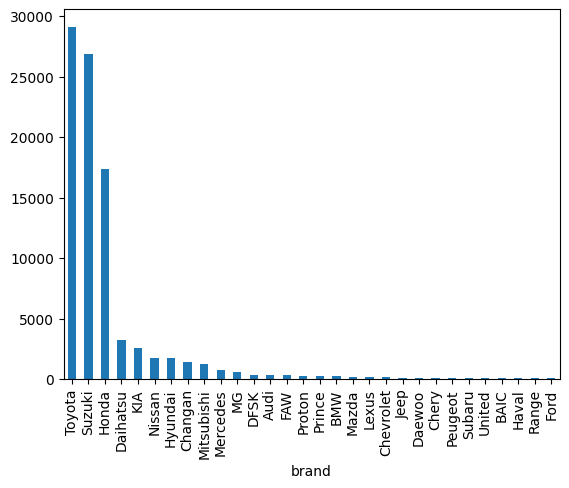

In [17]:
df.brand.value_counts().nlargest(30).plot(kind="bar")

## Selecting Specific Brands


In [18]:
df = df[
    (df["brand"] == "Toyota")
    | (df["brand"] == "Suzuki")
    | (df["brand"] == "Honda")
    | (df["brand"] == "KIA")
    | (df["brand"] == "Daihatsu")
    | (df["brand"] == "Hyundai")
    | (df["brand"] == "Changan")
    | (df["brand"] == "Nissan")
    | (df["brand"] == "Mitsubishi")
]

In [19]:
df.shape

(85256, 10)

## Unique value in every columns


In [20]:
columns = df.columns
print("No of unique items in each columns")
print("--------------------------------------------------")
for column in columns:
    print("No of unique items in ", column, " = ", df[column].nunique())
print("--------------------------------------------------")

No of unique items in each columns
--------------------------------------------------
No of unique items in  title  =  8268
No of unique items in  model_year  =  33
No of unique items in  price  =  2137
No of unique items in  mileage  =  9232
No of unique items in  engine_type  =  3
No of unique items in  transmission  =  2
No of unique items in  registered_in  =  139
No of unique items in  color  =  23
No of unique items in  brand  =  9
No of unique items in  vehicle  =  276
--------------------------------------------------


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85256 entries, 0 to 89955
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          85256 non-null  object 
 1   model_year     82980 non-null  float64
 2   price          85255 non-null  object 
 3   mileage        85255 non-null  object 
 4   engine_type    84452 non-null  object 
 5   transmission   85255 non-null  object 
 6   registered_in  85255 non-null  object 
 7   color          83460 non-null  object 
 8   brand          85256 non-null  object 
 9   vehicle        85256 non-null  object 
dtypes: float64(1), object(9)
memory usage: 7.2+ MB


In [22]:
df.price.value_counts()

price
Call for price     1249
PKR 22 lacs         755
PKR 21 lacs         730
PKR 13.5 lacs       718
PKR 7.5 lacs        707
PKR 18.5 lacs       693
PKR 12.5 lacs       690
PKR 6.5 lacs        683
PKR 22.5 lacs       677
PKR 19.5 lacs       659
PKR 8.5 lacs        653
PKR 21.5 lacs       653
PKR 25 lacs         653
PKR 23 lacs         650
PKR 20 lacs         636
PKR 35 lacs         607
PKR 18 lacs         602
PKR 16.5 lacs       584
PKR 26.5 lacs       584
PKR 17.5 lacs       584
PKR 14.5 lacs       583
PKR 12 lacs         580
PKR 11.5 lacs       576
PKR 30 lacs         573
PKR 15 lacs         560
PKR 13 lacs         559
PKR 10.5 lacs       554
PKR 14 lacs         552
PKR 26 lacs         551
PKR 23.5 lacs       541
PKR 20.5 lacs       540
PKR 25.5 lacs       539
PKR 32 lacs         538
PKR 7 lacs          537
PKR 19 lacs         533
PKR 24 lacs         532
PKR 24.5 lacs       527
PKR 9.5 lacs        527
PKR 15.5 lacs       525
PKR 11 lacs         506
PKR 28.5 lacs       505
PKR 8 lacs

<Axes: xlabel='model_year'>

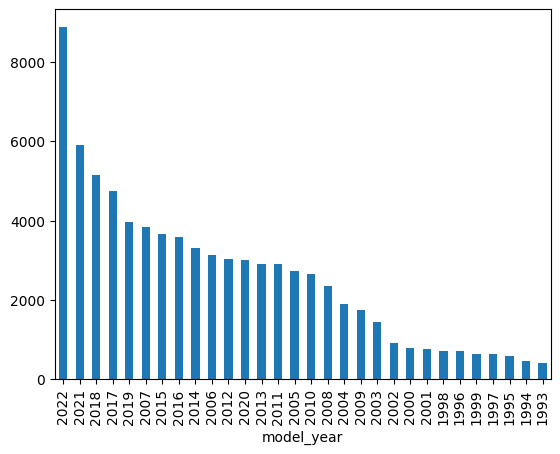

In [62]:
df.model_year.value_counts().nlargest(30).plot(kind="bar")

<Axes: xlabel='mileage'>

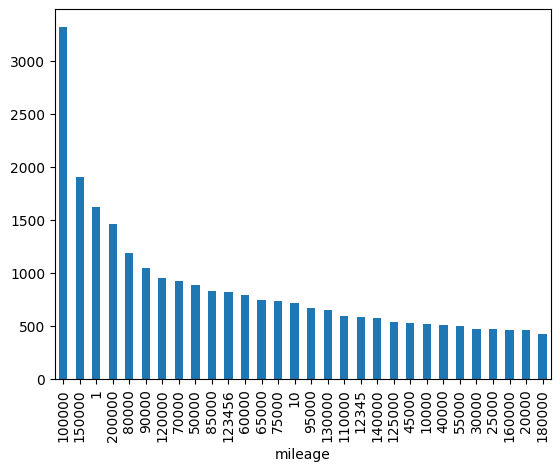

In [63]:
df.mileage.value_counts().nlargest(30).plot(kind="bar")

<Axes: xlabel='price'>

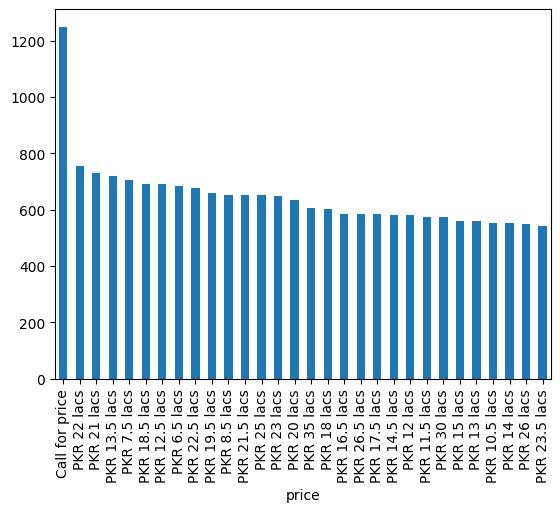

In [23]:
df.price.value_counts().nlargest(30).plot(kind="bar")

<Axes: xlabel='registered_in'>

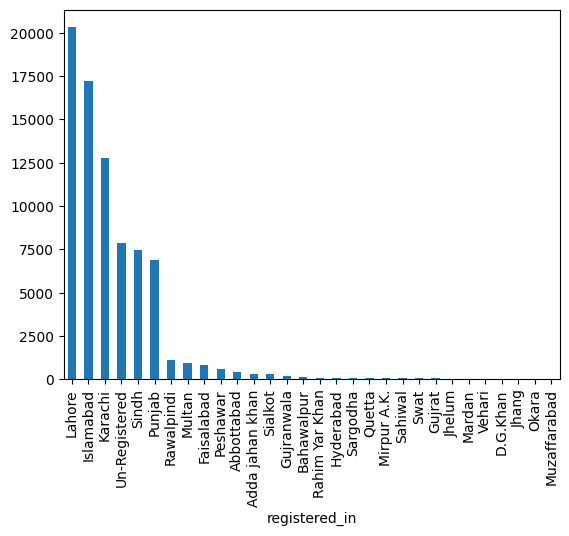

In [67]:
df.registered_in.value_counts().nlargest(30).plot(kind="bar")

## Remove data where price is not provided and correct the format of price and convert it into lacs


In [24]:
df = df[df.price != "Call for price"]

In [25]:
df.head(1)

,title,model_year,price,mileage,engine_type,transmission,registered_in,color,brand,vehicle
0,Honda Civic VTi Oriel Prosmatec 1.8 i-VTEC 2007,2007.0,PKR 16.5 lacs,"100,000 km",Petrol,Automatic,Lahore,Grey,Honda,Civic


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84007 entries, 0 to 89955
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          84007 non-null  object 
 1   model_year     81733 non-null  float64
 2   price          84006 non-null  object 
 3   mileage        84006 non-null  object 
 4   engine_type    83203 non-null  object 
 5   transmission   84006 non-null  object 
 6   registered_in  84006 non-null  object 
 7   color          82278 non-null  object 
 8   brand          84007 non-null  object 
 9   vehicle        84007 non-null  object 
dtypes: float64(1), object(9)
memory usage: 7.1+ MB


In [27]:
df.dropna(inplace=True)

In [28]:
df["crore"] = df.price.apply(
    lambda x: (x.split(" ")[1]) if "crore" in x.split(" ") else 0
)

In [29]:
df.head(1)

,title,model_year,price,mileage,engine_type,transmission,registered_in,color,brand,vehicle,crore
0,Honda Civic VTi Oriel Prosmatec 1.8 i-VTEC 2007,2007.0,PKR 16.5 lacs,"100,000 km",Petrol,Automatic,Lahore,Grey,Honda,Civic,0


In [30]:
df.crore = df.crore.astype(float)

In [31]:
df.crore = df.crore * 100

In [32]:
df.price.value_counts()

price
PKR 22 lacs        724
PKR 21 lacs        709
PKR 13.5 lacs      686
PKR 18.5 lacs      667
PKR 22.5 lacs      657
PKR 12.5 lacs      656
PKR 7.5 lacs       644
PKR 19.5 lacs      636
PKR 21.5 lacs      635
PKR 25 lacs        629
PKR 23 lacs        627
PKR 6.5 lacs       613
PKR 20 lacs        610
PKR 8.5 lacs       607
PKR 35 lacs        586
PKR 18 lacs        577
PKR 26.5 lacs      573
PKR 17.5 lacs      561
PKR 14.5 lacs      558
PKR 12 lacs        555
PKR 30 lacs        555
PKR 16.5 lacs      554
PKR 11.5 lacs      540
PKR 15 lacs        539
PKR 26 lacs        538
PKR 13 lacs        533
PKR 10.5 lacs      527
PKR 23.5 lacs      525
PKR 25.5 lacs      525
PKR 20.5 lacs      525
PKR 19 lacs        521
PKR 14 lacs        520
PKR 32 lacs        520
PKR 24.5 lacs      514
PKR 24 lacs        511
PKR 15.5 lacs      502
PKR 28.5 lacs      490
PKR 28 lacs        488
PKR 9.5 lacs       484
PKR 17 lacs        482
PKR 11 lacs        479
PKR 27 lacs        478
PKR 40 lacs        475
PKR 7

In [33]:
df.price = df.price.apply(lambda x: (x.split(" ")[1] if "lacs" in x.split(" ") else 0))

In [34]:
df.price.value_counts()

price
0        2145
22        724
21        709
13.5      686
18.5      667
22.5      657
12.5      656
7.5       644
19.5      636
21.5      635
25        629
23        627
6.5       613
20        610
8.5       607
35        586
18        577
26.5      573
17.5      561
14.5      558
30        555
12        555
16.5      554
11.5      540
15        539
26        538
13        533
10.5      527
20.5      525
23.5      525
25.5      525
19        521
32        520
14        520
24.5      514
24        511
15.5      502
28.5      490
28        488
9.5       484
17        482
11        479
27        478
40        475
7         470
16        458
8         456
9         455
27.5      453
29        438
31        435
38        434
33        433
36        427
5.5       409
36.5      392
45        388
32.5      381
6         380
29.5      378
10        375
37        375
42        368
31.5      361
34        360
34.5      345
38.5      304
39        300
35.5      300
30.5      296
33.5      289


In [35]:
df.price = df.price.astype(float)

In [36]:
df.price = df.price + df.crore

In [37]:
df.price.value_counts()

price
22.00      724
21.00      709
13.50      686
18.50      667
22.50      657
12.50      656
7.50       644
19.50      636
21.50      635
25.00      629
23.00      627
6.50       613
20.00      610
8.50       607
35.00      586
18.00      577
26.50      573
17.50      561
14.50      558
12.00      555
30.00      555
16.50      554
11.50      540
15.00      539
26.00      538
13.00      533
10.50      527
23.50      525
25.50      525
20.50      525
19.00      521
14.00      520
32.00      520
24.50      514
24.00      511
15.50      502
28.50      490
28.00      488
9.50       484
17.00      482
11.00      479
27.00      478
40.00      475
7.00       470
16.00      458
8.00       456
9.00       455
27.50      453
29.00      438
31.00      435
38.00      434
33.00      433
36.00      427
5.50       409
36.50      392
45.00      388
32.50      381
6.00       380
29.50      378
10.00      375
37.00      375
42.00      368
31.50      361
34.00      360
34.50      345
38.50      304
35.5

In [38]:
df.head(1)

,title,model_year,price,mileage,engine_type,transmission,registered_in,color,brand,vehicle,crore
0,Honda Civic VTi Oriel Prosmatec 1.8 i-VTEC 2007,2007.0,16.5,"100,000 km",Petrol,Automatic,Lahore,Grey,Honda,Civic,0.0


In [39]:
df.drop("crore", axis=1, inplace=True)

In [40]:
df.head(1)

,title,model_year,price,mileage,engine_type,transmission,registered_in,color,brand,vehicle
0,Honda Civic VTi Oriel Prosmatec 1.8 i-VTEC 2007,2007.0,16.5,"100,000 km",Petrol,Automatic,Lahore,Grey,Honda,Civic


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79444 entries, 0 to 89955
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          79444 non-null  object 
 1   model_year     79444 non-null  float64
 2   price          79444 non-null  float64
 3   mileage        79444 non-null  object 
 4   engine_type    79444 non-null  object 
 5   transmission   79444 non-null  object 
 6   registered_in  79444 non-null  object 
 7   color          79444 non-null  object 
 8   brand          79444 non-null  object 
 9   vehicle        79444 non-null  object 
dtypes: float64(2), object(8)
memory usage: 6.7+ MB


In [42]:
df.model_year = df.model_year.astype(int)

In [43]:
df.mileage = df.mileage.apply(lambda x: (x.split(" ")[0]))

In [44]:
df.mileage = df.mileage.apply(lambda x: (x.replace(",", "")))

In [45]:
df.head(1)

,title,model_year,price,mileage,engine_type,transmission,registered_in,color,brand,vehicle
0,Honda Civic VTi Oriel Prosmatec 1.8 i-VTEC 2007,2007,16.5,100000,Petrol,Automatic,Lahore,Grey,Honda,Civic


In [46]:
df.drop("title", axis=1, inplace=True)

In [47]:
columns = df.columns
print("No of unique items in each columns")
print("--------------------------------------------------")
for column in columns:
    print("No of unique items in ", column, " = ", df[column].nunique())
print("--------------------------------------------------")

No of unique items in each columns
--------------------------------------------------
No of unique items in  model_year  =  33
No of unique items in  price  =  2090
No of unique items in  mileage  =  8609
No of unique items in  engine_type  =  3
No of unique items in  transmission  =  2
No of unique items in  registered_in  =  130
No of unique items in  color  =  23
No of unique items in  brand  =  9
No of unique items in  vehicle  =  265
--------------------------------------------------


In [48]:
df.transmission.value_counts()

transmission
Automatic    40831
Manual       38613
Name: count, dtype: int64

<Axes: xlabel='transmission'>

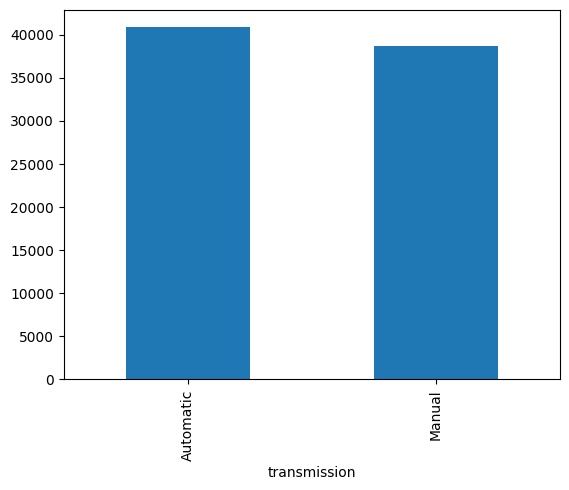

In [49]:
df.transmission.value_counts().plot(kind="bar")

In [50]:
df.engine_type.value_counts()

engine_type
Petrol    73656
Diesel     3212
Hybrid     2576
Name: count, dtype: int64

<Axes: xlabel='engine_type'>

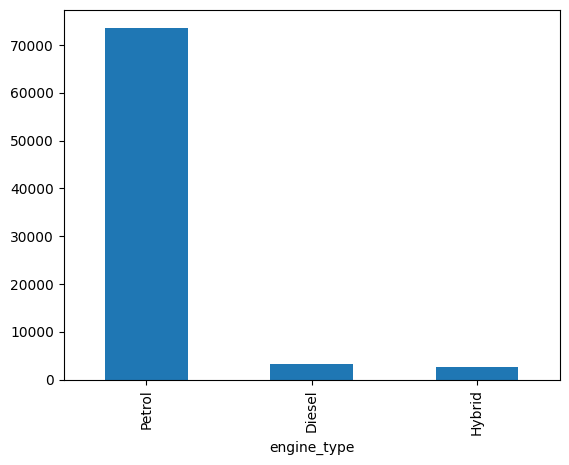

In [51]:
df.engine_type.value_counts().plot(kind="bar")

In [52]:
df.sample(5)

,model_year,price,mileage,engine_type,transmission,registered_in,color,brand,vehicle
83209,2022,56.00,3000,Petrol,Automatic,Islamabad,White,Toyota,Corolla
53753,2006,13.15,90000,Petrol,Automatic,Karachi,White,Nissan,Sunny
71791,2015,26.90,65000,Petrol,Automatic,Islamabad,Grey,Honda,City
52255,2015,26.00,87200,Petrol,Automatic,Islamabad,Black,Toyota,Passo
60832,2017,9.80,64700,Petrol,Manual,Lahore,White,Suzuki,Mehran


In [53]:
df.head(2)

,model_year,price,mileage,engine_type,transmission,registered_in,color,brand,vehicle
0,2007,16.5,100000,Petrol,Automatic,Lahore,Grey,Honda,Civic
1,2012,7.0,100000,Petrol,Manual,Faisalabad,Grey,Suzuki,Mehran


In [54]:
column_order = [
    "model_year",
    "mileage",
    "registered_in",
    "color",
    "brand",
    "vehicle",
    "transmission",
    "engine_type",
    "price",
]
df = df[column_order]

In [55]:
df.head(2)

,model_year,mileage,registered_in,color,brand,vehicle,transmission,engine_type,price
0,2007,100000,Lahore,Grey,Honda,Civic,Automatic,Petrol,16.5
1,2012,100000,Faisalabad,Grey,Suzuki,Mehran,Manual,Petrol,7.0


In [56]:
print("We have data of", df.shape[0], "vehicles")

We have data of 79444 vehicles


<Axes: xlabel='color'>

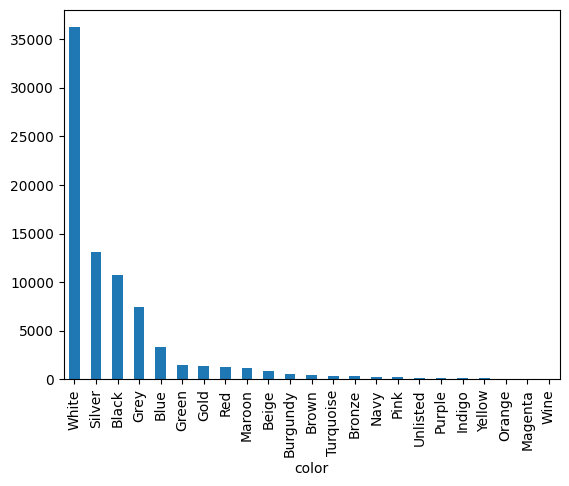

In [57]:
df.color.value_counts().nlargest(30).plot(kind="bar")

In [58]:
df = df[
    (df["color"] == "Grey")
    | (df["color"] == "Black")
    | (df["color"] == "Silver")
    | (df["color"] == "White")
    | (df["color"] == "Blue")
    | (df["color"] == "Green")
    | (df["color"] == "Maroon")
    | (df["color"] == "Red")
    | (df["color"] == "Burgundy")
    | (df["color"] == "Turquoise")
    | (df["color"] == "Gold")
    | (df["color"] == "Beige")
    | (df["color"] == "Brown")
    | (df["color"] == "Navy")
    | (df["color"] == "Yellow")
]

In [59]:
df.shape

(78410, 9)

In [60]:
df.shape

(78410, 9)

In [61]:
df.reset_index(drop=True, inplace=True)
df.to_csv("cleaned_data.csv", index=True)